## Note: notebook is done in R kernel
# Problem:
Classify tissue samples from a set of features (classes: Benign or Malignant)
Therefore, this is a classification problem.
# Approach:
1. "clean" data (use complete cases, normalization, etc.
2. Look at balance of classes
3. Use Random Forest as preliminary model
4. PCA and use Random Forest

In [1]:
# Load data
df=read.csv('breast-cancer-wisconsin.csv',stringsAsFactors=FALSE,header=FALSE)
# Name columns
names(df)=c('ID','Clump','CellSize','CellShape','Adhesion','EplCellSize','Nuclei','Chromatin','Nucleoli','Mitoses','Class')

In [2]:
df[1:5,]

,ID,Clump,CellSize,CellShape,Adhesion,EplCellSize,Nuclei,Chromatin,Nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#check size
dim(df)

[1] 699  11

In [4]:
#check and remove duplicates
df[duplicated(df), ]
ndf=df[!duplicated(df), ]

,ID,Clump,CellSize,CellShape,Adhesion,EplCellSize,Nuclei,Chromatin,Nucleoli,Mitoses,Class
209,1218860,1,1,1,1,1,1,3,1,1,2
254,1100524,6,10,10,2,8,10,7,3,3,4
255,1116116,9,10,10,1,10,8,3,3,1,4
259,1198641,3,1,1,1,2,1,3,1,1,2
273,320675,3,3,5,2,3,10,7,1,1,4
339,704097,1,1,1,1,1,1,2,1,1,2
562,1321942,5,1,1,1,2,1,3,1,1,2
685,466906,1,1,1,1,2,1,1,1,1,2


In [5]:
#check size again
dim(ndf)

[1] 691  11

In [6]:
#remove ID column
ndf=ndf[-1]

In [7]:
#relabel classes (2-benign, 4-malignant)
ndf$Class=factor(ndf$Class,levels=c(2,4),
                 labels=c("Benign","Malignant"))

In [8]:
#check ratios of labels as percentage
round(prop.table(table(ndf$Class))*100,digits=1)


   Benign Malignant 
     65.6      34.4 

In [9]:
#summary of df
summary(ndf)

     Clump           CellSize       CellShape         Adhesion     
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.00   Median : 1.000   Median : 1.000  
 Mean   : 4.427   Mean   : 3.13   Mean   : 3.201   Mean   : 2.825  
 3rd Qu.: 6.000   3rd Qu.: 5.00   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.00   Max.   :10.000   Max.   :10.000  
  EplCellSize        Nuclei            Chromatin         Nucleoli     
 Min.   : 1.000   Length:691         Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   Class :character   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Mode  :character   Median : 3.000   Median : 1.000  
 Mean   : 3.211                      Mean   : 3.436   Mean   : 2.883  
 3rd Qu.: 4.000                      3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000                      Max.   :10.000   Max.   :10.000  
    Mitoses             Cla

In [10]:
#convert Nuclei to numeric
ndf[, 6] = sapply(ndf[, 6], as.numeric)

Warning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercionWarning message:
In lapply(X = X, FUN = FUN, ...): NAs introduced by coercio

In [11]:
#summary of df
summary(ndf)

     Clump           CellSize       CellShape         Adhesion     
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.00   Median : 1.000   Median : 1.000  
 Mean   : 4.427   Mean   : 3.13   Mean   : 3.201   Mean   : 2.825  
 3rd Qu.: 6.000   3rd Qu.: 5.00   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.00   Max.   :10.000   Max.   :10.000  
                                                                   
  EplCellSize         Nuclei         Chromatin         Nucleoli     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.211   Mean   : 3.538   Mean   : 3.436   Mean   : 2.883  
 3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   

In [12]:
#remove incomplete cases (ie missing data in Nuclei)
ndf=ndf[complete.cases(ndf), ]
summary(ndf)

     Clump           CellSize        CellShape         Adhesion     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.452   Mean   : 3.147   Mean   : 3.209   Mean   : 2.849  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
  EplCellSize        Nuclei         Chromatin         Nucleoli     
 Min.   : 1.00   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.00   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.00   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.23   Mean   : 3.538   Mean   : 3.443   Mean   : 2.886  
 3rd Qu.: 4.00   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.00   Max.   :10.000   Max.   :10.000   Max.   :10.000  
    Mitoses             Class    
 Min.  

In [13]:
#normalize df
normalize=function(x){
    return((x-mean(x))/sd(x))
}

In [14]:
norm_df=ndf
norm_df[,-ncol(norm_df)]=sapply(norm_df[,-ncol(norm_df)],normalize)

In [15]:
summary(norm_df)

     Clump            CellSize         CellShape          Adhesion      
 Min.   :-1.2237   Min.   :-0.7027   Min.   :-0.7421   Min.   :-0.6429  
 1st Qu.:-0.8692   1st Qu.:-0.7027   1st Qu.:-0.7421   1st Qu.:-0.6429  
 Median :-0.1602   Median :-0.7027   Median :-0.7421   Median :-0.6429  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5488   3rd Qu.: 0.6067   3rd Qu.: 0.6017   3rd Qu.: 0.4003  
 Max.   : 1.9668   Max.   : 2.2433   Max.   : 2.2815   Max.   : 2.4865  
  EplCellSize          Nuclei          Chromatin          Nucleoli      
 Min.   :-1.0096   Min.   :-0.6976   Min.   :-0.9955   Min.   :-0.6152  
 1st Qu.:-0.5568   1st Qu.:-0.6976   1st Qu.:-0.5880   1st Qu.:-0.6152  
 Median :-0.5568   Median :-0.6976   Median :-0.1805   Median :-0.6152  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.3488   3rd Qu.: 0.6768   3rd Qu.: 0.6345   3rd Qu.: 0.3634  
 Max.   : 3.0656   Max.   : 1.7764   Max.   : 2.672

In [16]:
# load infamous caret package - R ML package
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [17]:
#split data using caret
set.seed(107) #random seed
inTrain = createDataPartition(y = norm_df$Class,
                ## the outcome data are needed
                p = .66,
                ## The percentage of data in the
                ## training set
                list = FALSE)
                ## The format of the results
train=norm_df[inTrain,]
test=norm_df[-inTrain,]

In [18]:
#verify number of rows for each split
nrow(train)
nrow(test)
sum(nrow(train),nrow(test))/sum(nrow(norm_df)) # ratio of totals, expect =1

[1] 446

[1] 229

[1] 1

In [19]:
# let's try random forest
library(randomForest)
library(e1071)
rf_model =train(Class~.,data=train,method="rf",importance=TRUE,
                trControl=trainControl(method="cv",number=10),
                # 10 fold cross validation
                prox=TRUE,allowParallel=TRUE)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [20]:
print(rf_model)

Random Forest 

446 samples
  9 predictors
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 401, 401, 402, 401, 401, 401, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      Accuracy SD  Kappa SD  
  2     0.9641919  0.9219219  0.01546157   0.03303214
  5     0.9663636  0.9263526  0.01579839   0.03468417
  9     0.9619192  0.9163767  0.01498827   0.03298733

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 5. 


In [21]:
print(rf_model$finalModel)


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE,      proximity = TRUE, allowParallel = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 3.59%
Confusion matrix:
          Benign Malignant class.error
Benign       281         9  0.03103448
Malignant      7       149  0.04487179


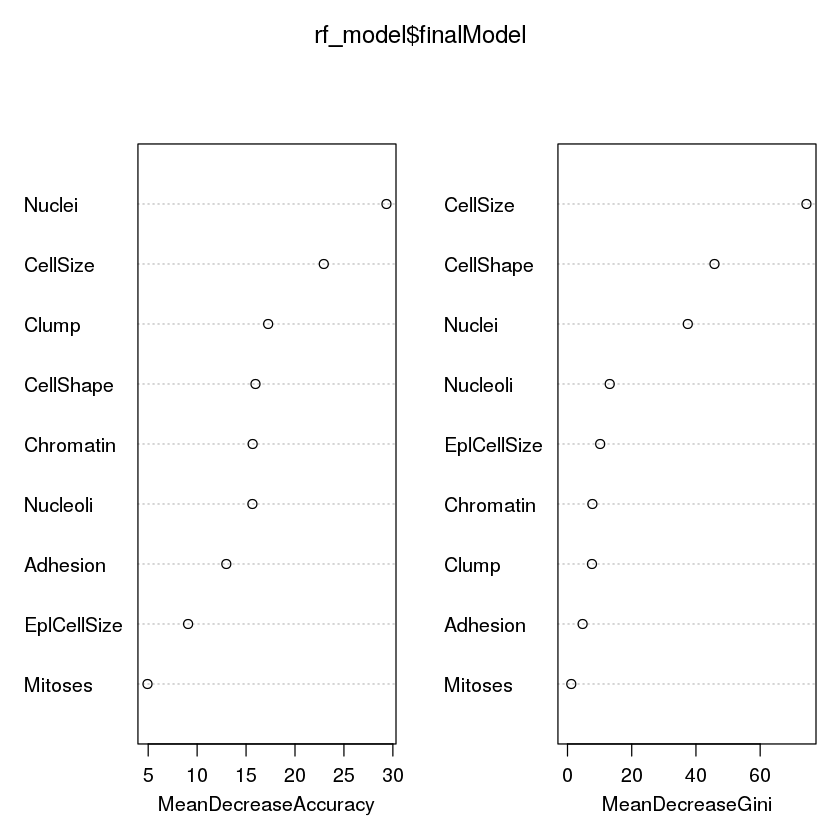

In [22]:
varImpPlot(rf_model$finalModel)

In [23]:
rf_predict=predict(rf_model$finalModel,test[-ncol(test)])

In [24]:
confusionMatrix(rf_predict,test[,ncol(test)])

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign       146         3
  Malignant      3        77
                                          
               Accuracy : 0.9738          
                 95% CI : (0.9438, 0.9903)
    No Information Rate : 0.6507          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9424          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9799          
            Specificity : 0.9625          
         Pos Pred Value : 0.9799          
         Neg Pred Value : 0.9625          
             Prevalence : 0.6507          
         Detection Rate : 0.6376          
   Detection Prevalence : 0.6507          
      Balanced Accuracy : 0.9712          
                                          
       'Positive' Class : Benign          
                                          

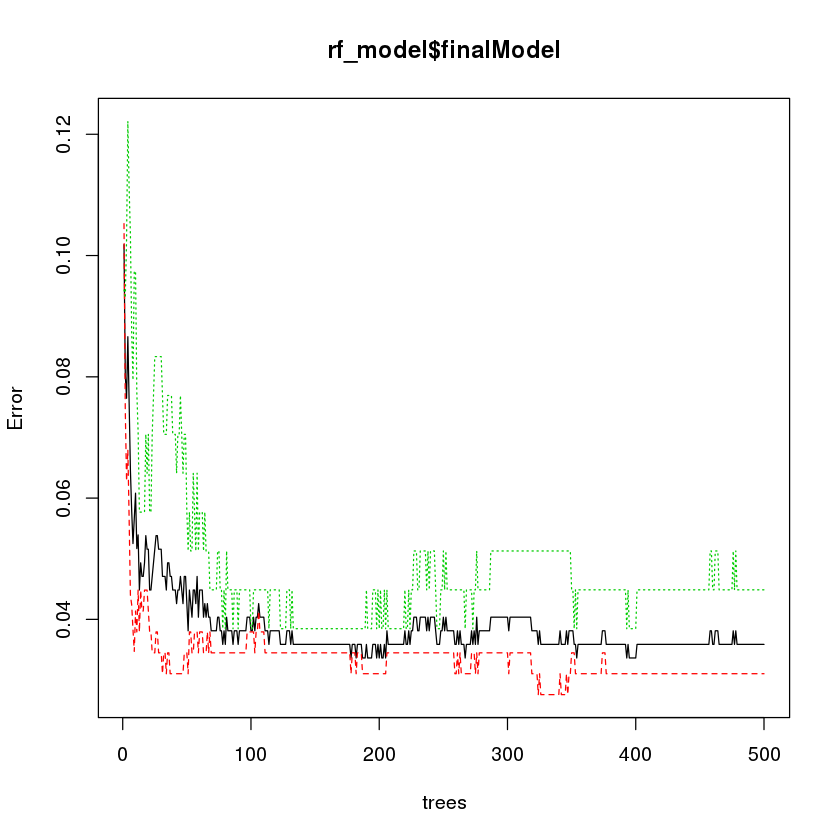

In [25]:
plot(rf_model$finalModel)

In [26]:
# great, let's do it in PC's now
pca.result = prcomp(train[,-ncol(train)], scale=T)
train.pca = pca.result$x
train.pcadf=data.frame(train.pca,train$Class)
names(train.pcadf)[ncol(train.pcadf)]='Class'
train.pca$Class=train$Class
test.pca = predict(pca.result, test[,-ncol(test)])
test.pcadf=data.frame(test.pca,test$Class)
names(test.pcadf)[ncol(test.pcadf)]='Class'
train.pcadf[1:10,]

Warning message:
In train.pca$Class = train$Class: Coercing LHS to a list

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Class
1,1.475845,-0.1463803,0.5372151,-0.1124701,0.04068691,-0.2414412,-0.2667234,-0.4745394,0.001737605,Benign
2,-1.457468,-0.5134447,-0.4234725,-0.3930774,0.8174082,1.792546,-0.6143563,0.4185412,-0.07360716,Benign
3,1.597359,-0.06541807,-0.08636434,-0.1049371,-0.08060119,-0.1607784,-0.3926917,-0.0730871,-0.02396344,Benign
4,-1.506127,-0.4456757,0.9523194,1.165409,-0.2425549,-0.5478761,0.9725145,1.370644,-0.1269729,Benign
5,1.354099,-0.1665309,-0.1083898,-0.2794763,0.07833882,-0.149587,0.04975689,-0.6750359,0.03559441,Benign
6,-5.054062,-1.60025,-0.4152285,0.4666184,0.5495554,-0.2186096,-0.1176108,0.2173132,0.03410983,Malignant
7,1.068194,-0.4197492,-0.8370226,-1.120793,-0.590881,0.6740811,-1.146258,1.286833,-0.1909191,Benign
8,1.668734,0.0531437,-0.355919,0.1690043,0.02447764,-0.3583017,-0.2337276,0.06920715,0.226194,Benign
9,1.486334,2.438902,-0.07022293,-0.7149551,-0.1486864,-0.2605758,-0.003355382,0.0865867,-0.04531282,Benign
11,2.057448,0.04975702,-0.6387783,-0.01630193,-0.2637992,-0.5559967,-0.178776,0.1342403,-0.02149267,Benign


In [27]:
# let's try random forest
library(randomForest)
library(e1071)
rf_model =train(Class~.,data=train.pcadf,method="rf",importance=TRUE,
                trControl=trainControl(method="cv",number=10),
                # 5 fold cross validation
                prox=TRUE,allowParallel=TRUE)

In [28]:
print(rf_model)

Random Forest 

446 samples
  9 predictors
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 401, 401, 401, 402, 402, 402, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      Accuracy SD  Kappa SD  
  2     0.9640404  0.9220674  0.02166007   0.04648073
  5     0.9640404  0.9220674  0.02166007   0.04648073
  9     0.9595960  0.9126050  0.02739508   0.05812684

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2. 


In [29]:
print(rf_model$finalModel)


Call:
 randomForest(x = x, y = y, mtry = param$mtry, importance = TRUE,      proximity = TRUE, allowParallel = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.81%
Confusion matrix:
          Benign Malignant class.error
Benign       277        13  0.04482759
Malignant      4       152  0.02564103


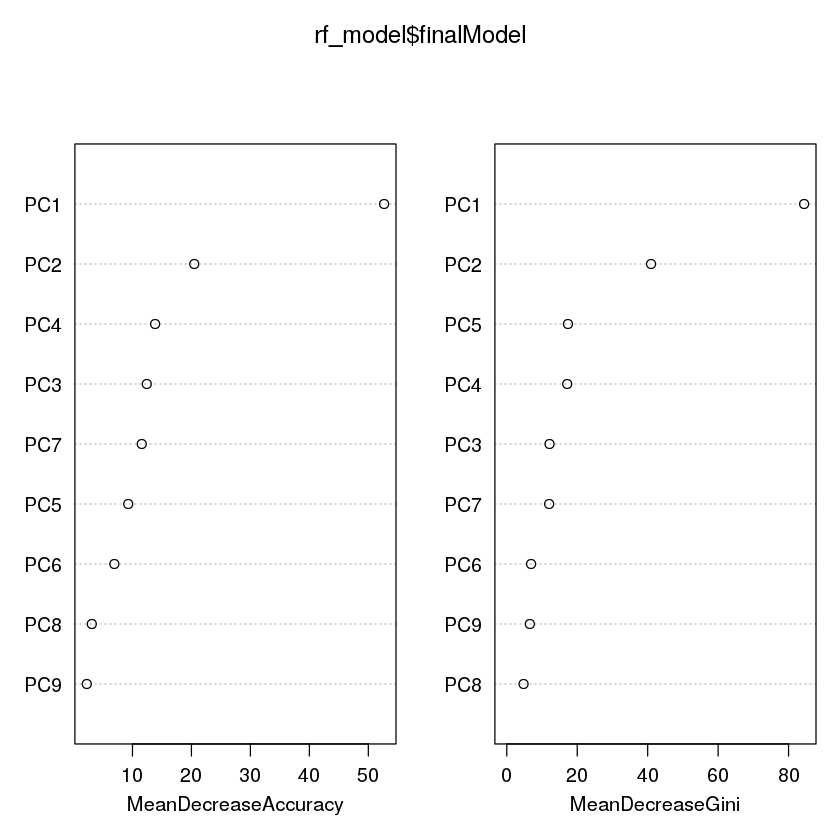

In [30]:
varImpPlot(rf_model$finalModel)

In [31]:
rf_predict=predict(rf_model$finalModel,test.pcadf[-ncol(test.pcadf)])

In [32]:
confusionMatrix(rf_predict,test[,ncol(test)])

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign       145         2
  Malignant      4        78
                                          
               Accuracy : 0.9738          
                 95% CI : (0.9438, 0.9903)
    No Information Rate : 0.6507          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9427          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.9732          
            Specificity : 0.9750          
         Pos Pred Value : 0.9864          
         Neg Pred Value : 0.9512          
             Prevalence : 0.6507          
         Detection Rate : 0.6332          
   Detection Prevalence : 0.6419          
      Balanced Accuracy : 0.9741          
                                          
       'Positive' Class : Benign          
                                          

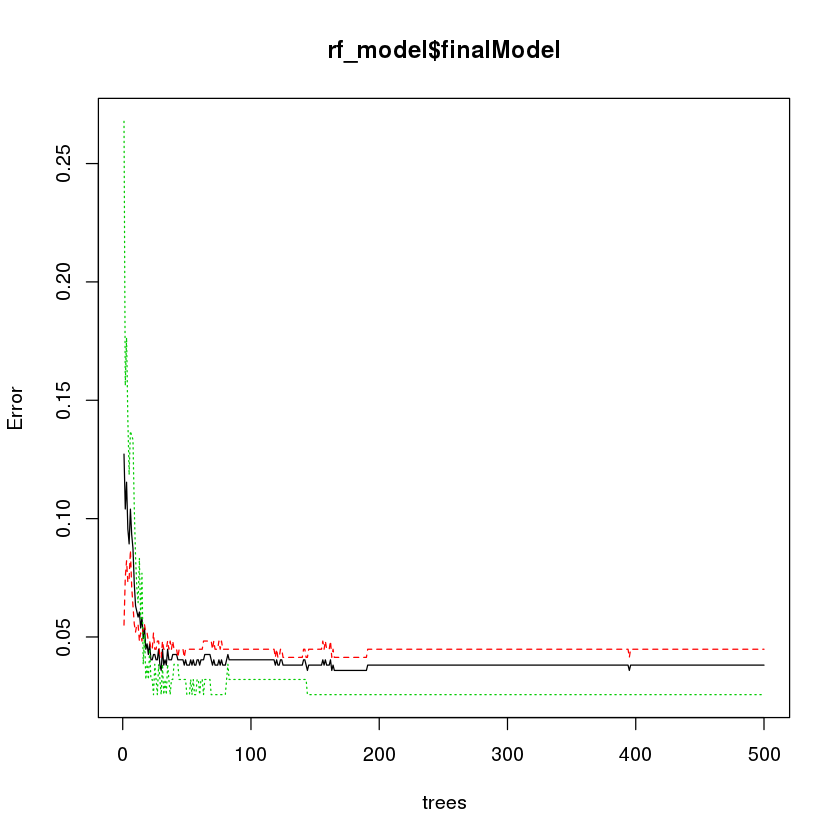

In [33]:
plot(rf_model$finalModel)